In [1]:
import sys 
sys.path.append('../')
import pandas as pd 
import numpy as np 
import ta
import sqlite3 as sql
import matplotlib.pyplot as plt 
from backtester import * 
from fxcmtoken import major_forex_pairs

In [2]:
print(major_forex_pairs)
conn = sql.connect('../PriceData/PriceData_m5.db')
ticker = major_forex_pairs[0]
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
for col in ['open', 'close', 'high', 'low']:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
conn.close()
data

['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,close,high,low
date,,,,,,,,,,,,,
2021-08-31 03:50:00,1.18172,1.18187,1.18188,1.18172,1.18185,1.18199,1.18201,1.18184,397,1.181785,1.181930,1.181945,1.181780
2021-08-31 03:55:00,1.18187,1.18189,1.18193,1.18174,1.18199,1.18201,1.18204,1.18187,429,1.181930,1.181950,1.181985,1.181805
2021-08-31 04:00:00,1.18189,1.18182,1.18190,1.18173,1.18201,1.18193,1.18201,1.18185,432,1.181950,1.181875,1.181955,1.181790
2021-08-31 04:05:00,1.18182,1.18191,1.18192,1.18178,1.18193,1.18204,1.18204,1.18191,294,1.181875,1.181975,1.181980,1.181845
2021-08-31 04:10:00,1.18191,1.18193,1.18201,1.18188,1.18204,1.18205,1.18213,1.18200,486,1.181975,1.181990,1.182070,1.181940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 13:15:00,1.15994,1.16033,1.16036,1.15994,1.16008,1.16044,1.16047,1.16008,1428,1.160010,1.160385,1.160415,1.160010
2021-10-18 13:20:00,1.16033,1.16071,1.16073,1.16033,1.16045,1.16084,1.16085,1.16044,1301,1.160390,1.160775,1.160790,1.160385
2021-10-18 13:25:00,1.16072,1.16103,1.16110,1.16063,1.16084,1.16115,1.16122,1.16075,1235,1.160780,1.161090,1.161160,1.160690


In [3]:
windows = (50, 10)
keltner = ta.volatility.KeltnerChannel(high=data['high'], low=data['low'], close=data['close'],
                                       window=windows[0], window_atr=windows[1], fillna=False, original_version=False)

In [4]:
data['keltner_perc'] = keltner.keltner_channel_pband()

In [5]:
data.dropna(inplace=True)

In [6]:
data 

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,close,high,low,keltner_perc
date,,,,,,,,,,,,,,
2021-08-31 07:55:00,1.18247,1.18271,1.18286,1.18238,1.18259,1.18283,1.18295,1.18249,600,1.182530,1.182770,1.182905,1.182435,0.758222
2021-08-31 08:00:00,1.18271,1.18284,1.18294,1.18252,1.18283,1.18296,1.18305,1.18264,769,1.182770,1.182900,1.182995,1.182580,0.838791
2021-08-31 08:05:00,1.18284,1.18276,1.18295,1.18274,1.18296,1.18288,1.18307,1.18286,701,1.182900,1.182820,1.183010,1.182800,0.773209
2021-08-31 08:10:00,1.18276,1.18266,1.18282,1.18265,1.18288,1.18279,1.18294,1.18277,518,1.182820,1.182725,1.182880,1.182710,0.695801
2021-08-31 08:15:00,1.18266,1.18254,1.18269,1.18250,1.18279,1.18266,1.18281,1.18262,612,1.182725,1.182600,1.182750,1.182560,0.587519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 13:15:00,1.15994,1.16033,1.16036,1.15994,1.16008,1.16044,1.16047,1.16008,1428,1.160010,1.160385,1.160415,1.160010,0.998869
2021-10-18 13:20:00,1.16033,1.16071,1.16073,1.16033,1.16045,1.16084,1.16085,1.16044,1301,1.160390,1.160775,1.160790,1.160385,1.192084
2021-10-18 13:25:00,1.16072,1.16103,1.16110,1.16063,1.16084,1.16115,1.16122,1.16075,1235,1.160780,1.161090,1.161160,1.160690,1.329031


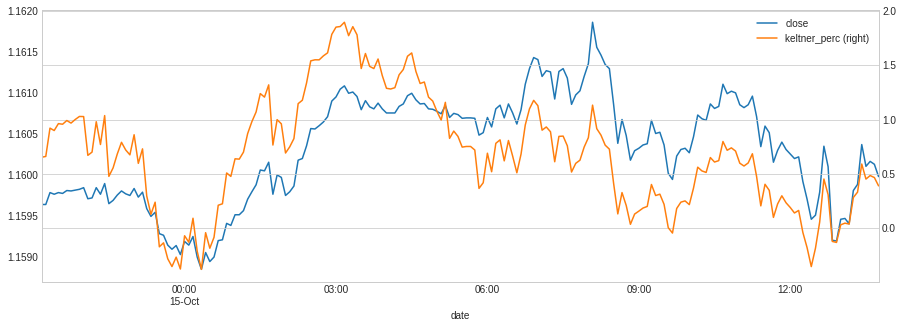

In [7]:
data[['close', 'keltner_perc']].iloc[-500:-300].plot(figsize=(15,5), secondary_y='keltner_perc')
plt.show()

In [8]:
data['keltner_perc'].describe()

count    9951.000000
mean        0.458842
std         0.534243
min        -1.241252
25%         0.112593
50%         0.466494
75%         0.814918
max         2.406709
Name: keltner_perc, dtype: float64

In [9]:
threshold = 0.5
print((data['keltner_perc'] > 1+threshold).mean()*100)
print((data['keltner_perc'] < 0-threshold).mean()*100)

2.6831474223696112
4.35132147522862


In [10]:
data['signal'] = np.where(data['keltner_perc'] > 1+threshold, -1,
                          np.where(data['keltner_perc'] < 0-threshold, 1, np.nan))
data['signal'] = data['signal'].ffill().fillna(0)

In [11]:
data['signal'].value_counts()

 1.0    5553
-1.0    4144
 0.0     254
Name: signal, dtype: int64

In [12]:
data['signal'].diff(1).apply(np.abs).value_counts()

0.0    9909
2.0      40
1.0       1
Name: signal, dtype: int64

  0%|          | 0/9950 [00:00<?, ?it/s]

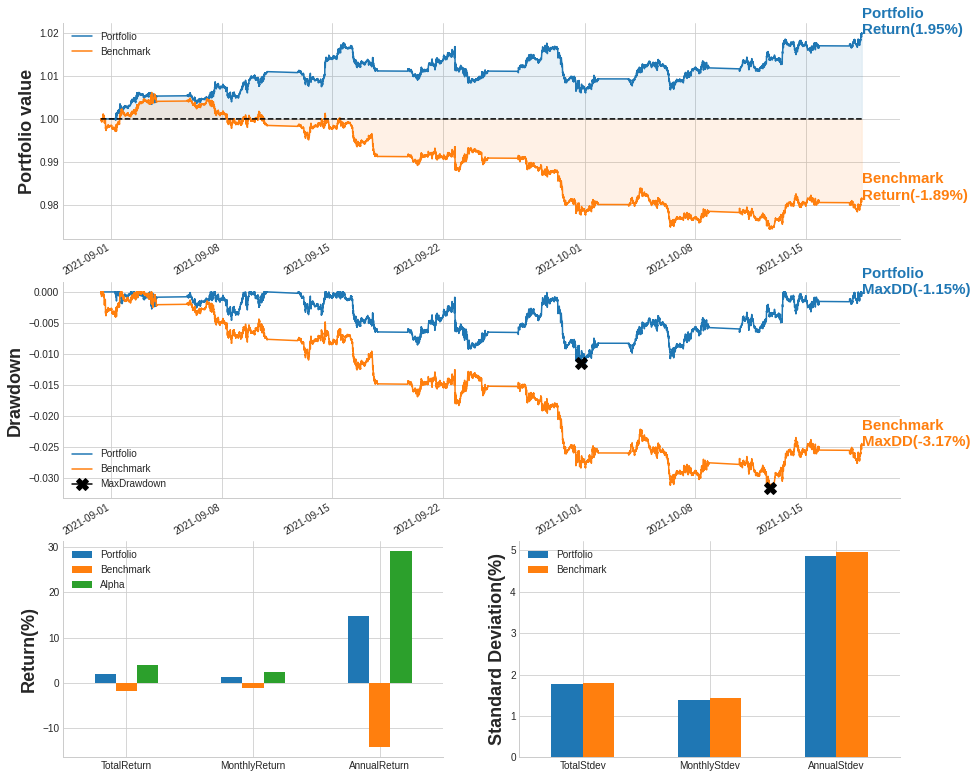

----------------------------------------------------------------------
Data length: |48 days 05:40:00|
Data range from |2021-08-31 07:55:00| to |2021-10-18 13:35:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │       1.954 │      -1.894 │   3.848 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │       1.215 │      -1.178 │   2.393 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │      14.783 │     -14.332 │  29.115 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │   

In [13]:
backtest = IterativeBacktester(data, data['signal'], 'm5')
backtest.backtest()
backtest.results()